
#**Pstance Analysis - Șuto Robert-Lucian & Drobnițchi Daniel Nicușor** 

For the proposed dataset, we are introduced with pairs of political stances on the 2020 US presidential selection.

The dataset is composed of 3 possible candidates, each '.csv' contains 3 columns:tweet, candidate, and favor.

The objective of this project is to use machine learning to determine which tweet is in favor of a certain candidate, based on the training data.


In [1]:
!unzip PStance.zip

Archive:  PStance.zip
  inflating: raw_test_bernie.csv     
  inflating: __MACOSX/._raw_test_bernie.csv  
  inflating: raw_test_biden.csv      
  inflating: __MACOSX/._raw_test_biden.csv  
  inflating: raw_test_trump.csv      
  inflating: __MACOSX/._raw_test_trump.csv  
  inflating: raw_train_bernie.csv    
  inflating: __MACOSX/._raw_train_bernie.csv  
  inflating: raw_train_biden.csv     
  inflating: __MACOSX/._raw_train_biden.csv  
  inflating: raw_train_trump.csv     
  inflating: __MACOSX/._raw_train_trump.csv  
  inflating: raw_val_bernie.csv      
  inflating: __MACOSX/._raw_val_bernie.csv  
  inflating: raw_val_biden.csv       
  inflating: __MACOSX/._raw_val_biden.csv  
  inflating: raw_val_trump.csv       
  inflating: __MACOSX/._raw_val_trump.csv  


In [1]:
!pip install Unidecode
!pip install nltk
!pip install wordcloud

You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from unidecode import unidecode
import re
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
import wordcloud



from sklearn import preprocessing
from sklearn import svm




## Import Data

In [2]:

# File to store target of data

prefix = './data/' # - Bobi
# prefix = '/content/' # - Dani


training_trump = pd.read_csv(prefix+'raw_train_trump.csv')
valid_trump = pd.read_csv(prefix+'raw_val_trump.csv')
test_trump = pd.read_csv(prefix+'raw_test_trump.csv')

training_biden = pd.read_csv(prefix+'raw_train_biden.csv')
valid_biden = pd.read_csv(prefix+'raw_val_biden.csv')
test_biden =  pd.read_csv(prefix+'raw_test_biden.csv')

training_bernie = pd.read_csv(prefix+'raw_train_bernie.csv')
valid_bernie = pd.read_csv(prefix+'raw_val_bernie.csv')
test_bernie = pd.read_csv(prefix+'raw_test_bernie.csv')

training_trump

,Tweet,Target,Stance
0,You COWARD... you should have been at THE WHIT...,Donald Trump,AGAINST
1,Cool. I trust he requested the same records fo...,Donald Trump,AGAINST
2,Off your meds again Donnie? You are surrounded...,Donald Trump,AGAINST
3,That has to happen anyway. But his profits wil...,Donald Trump,AGAINST
4,This is so stupid. Unmasking lets them know wh...,Donald Trump,AGAINST
...,...,...,...
6357,Right? Drug them into mental illness and then ...,Donald Trump,FAVOR
6358,Truly truly sad. We salute you Mr. President a...,Donald Trump,FAVOR
6359,I have faith @realDonaldTrump will do somethin...,Donald Trump,FAVOR
6360,Two people I'd pay not to listen to is #Donald...,Donald Trump,AGAINST


## Concatenate data

In [3]:
training_data = pd.concat([training_bernie,training_biden,training_trump])
valid_data = pd.concat([valid_bernie,valid_biden,valid_trump])
test_data = pd.concat([test_bernie,test_biden,test_trump])

## Importing Concatenated data

In [4]:
training_data

,Tweet,Target,Stance
0,"""Policy Over Politics"" & ""People Over Profits""...",Bernie Sanders,FAVOR
1,"""Bernie knows""? Bernie knows it's bullshit, bu...",Bernie Sanders,FAVOR
2,"Well, a sad day for all my communist friends. ...",Bernie Sanders,AGAINST
3,"Back in 1995, @SenSanders used his time to cal...",Bernie Sanders,FAVOR
4,Anyone else NOT comforted by promises to get t...,Bernie Sanders,AGAINST
...,...,...,...
6357,Right? Drug them into mental illness and then ...,Donald Trump,FAVOR
6358,Truly truly sad. We salute you Mr. President a...,Donald Trump,FAVOR
6359,I have faith @realDonaldTrump will do somethin...,Donald Trump,FAVOR
6360,Two people I'd pay not to listen to is #Donald...,Donald Trump,AGAINST


## Conversion Function

In [5]:
def StanceConversion(x):
  if x == "FAVOR":
    return 1
  return 0

In [6]:
training_data['Stance'] = training_data['Stance'].transform(StanceConversion)
valid_data['Stance'] = valid_data['Stance'].transform(StanceConversion)
test_data['Stance'] = test_data['Stance'].transform(StanceConversion)

In [7]:
training_data

,Tweet,Target,Stance
0,"""Policy Over Politics"" & ""People Over Profits""...",Bernie Sanders,1
1,"""Bernie knows""? Bernie knows it's bullshit, bu...",Bernie Sanders,1
2,"Well, a sad day for all my communist friends. ...",Bernie Sanders,0
3,"Back in 1995, @SenSanders used his time to cal...",Bernie Sanders,1
4,Anyone else NOT comforted by promises to get t...,Bernie Sanders,0
...,...,...,...
6357,Right? Drug them into mental illness and then ...,Donald Trump,1
6358,Truly truly sad. We salute you Mr. President a...,Donald Trump,1
6359,I have faith @realDonaldTrump will do somethin...,Donald Trump,1
6360,Two people I'd pay not to listen to is #Donald...,Donald Trump,0


## Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x170291e7e08>,
 [Text(-0.9590487479390196, 0.5387258106649421, 'Joe Biden'),
  Text(0.1500079457976844, -1.0897236421210468, 'Donald Trump'),
  Text(0.8766226748815437, 0.6644792591823523, 'Bernie Sanders')],
 [Text(-0.5231174988758288, 0.29385044218087747, '33.7%'),
  Text(0.08182251588964602, -0.5943947138842073, '36.9%'),
  Text(0.4781578226626601, 0.362443232281283, '29.4%')])

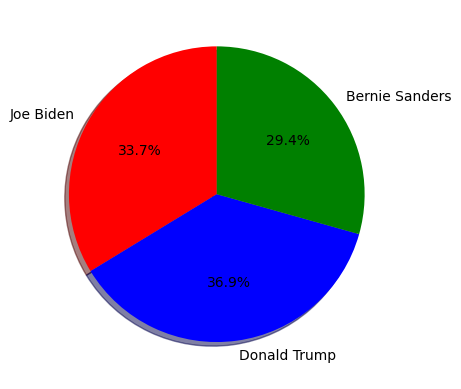

In [8]:
biden = len(training_data[training_data.Target=='Joe Biden'])
trump = len(training_data[training_data.Target=='Donald Trump'])
bernie = len(training_data[training_data.Target=='Bernie Sanders'])

labels = ['Joe Biden','Donald Trump', 'Bernie Sanders']
plt.pie([biden,trump,bernie], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['red','blue','green'])


([<matplotlib.patches.Wedge at 0x17029271908>,
 [Text(-1.098715300391308, -0.053147800387577736, 'Against'),
  Text(1.098715300391308, 0.0531478003875776, 'Favor')],
 [Text(-0.5992992547588952, -0.028989709302315127, '51.5%'),
  Text(0.5992992547588952, 0.02898970930231505, '48.5%')])

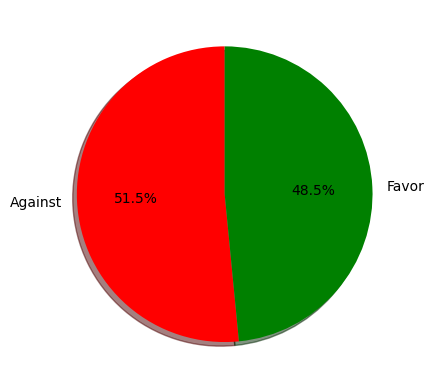

In [9]:
Against = len(training_data[training_data.Stance==0])
Favor = len(training_data[training_data.Stance==1])

labels = ['Against','Favor']
plt.pie([Against,Favor], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['red','green'])


## WordCloud

In [10]:
def gen_cloud(data,string):
  chosen = data[data['Target']==string]
  list_chosen = chosen.Tweet.values.tolist()
  list_text = chosen.Tweet.values.tolist()[0]
  for d in list_chosen[1::]:
    list_text = list_text+d
  return list_text


## Biden WordCloud

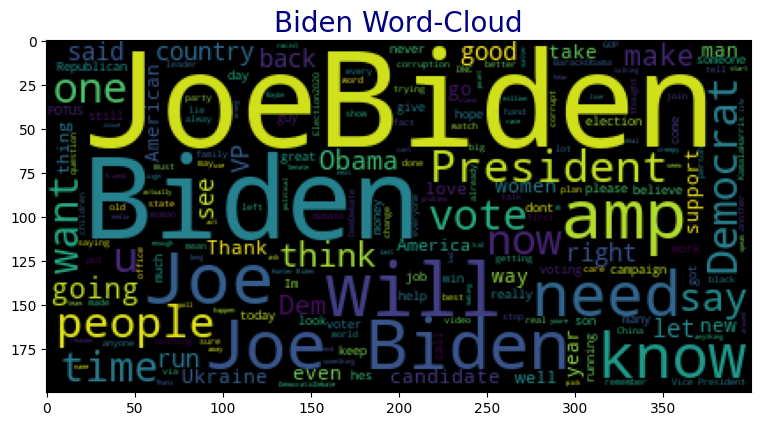

In [12]:
biden = gen_cloud(training_data,'Joe Biden')
wordcloud_biden = wordcloud.WordCloud().generate(biden)

plt.rcParams['figure.figsize']=(20,20)
plt.subplot(1,2,1)
plt.title('Biden Word-Cloud',color='navy',fontsize=20)
plt.imshow(wordcloud_biden)

## Trump WordCloud

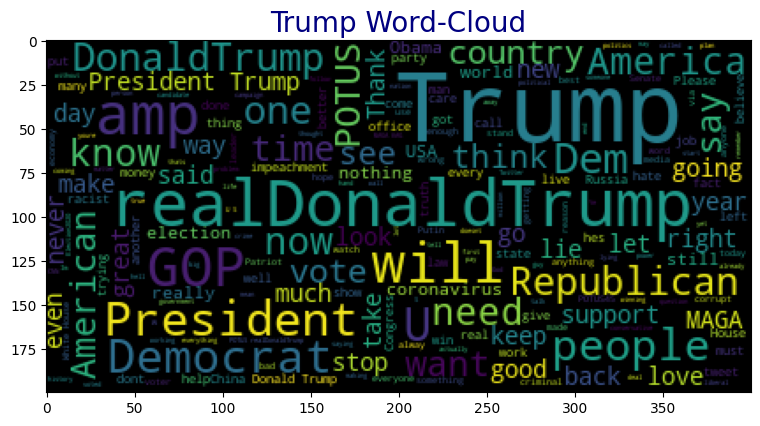

In [13]:
trump = gen_cloud(training_data,'Donald Trump')
wordcloud_trump = wordcloud.WordCloud().generate(trump)

plt.rcParams['figure.figsize']=(20,20)
plt.subplot(1,2,1)
plt.title('Trump Word-Cloud',color='navy',fontsize=20)
plt.imshow(wordcloud_trump)

## Bernie WordCloud

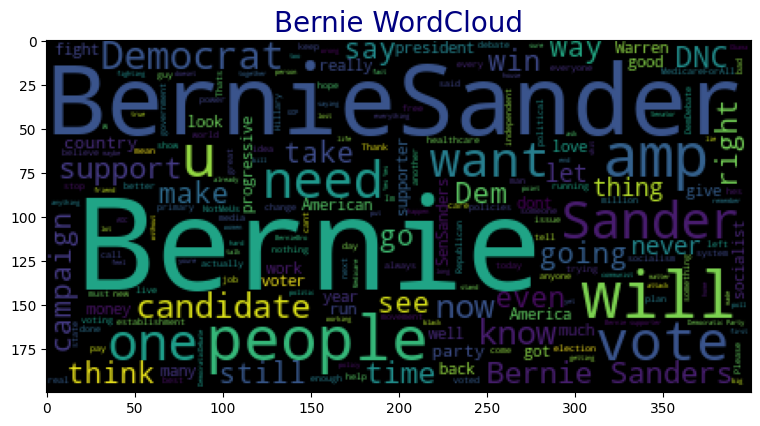

In [14]:
bernie = gen_cloud(training_data,'Bernie Sanders')
wordcloud_bernie = wordcloud.WordCloud().generate(bernie)

plt.rcParams['figure.figsize']=(20,20)
plt.subplot(1,2,1)
plt.title('Bernie WordCloud',color='navy',fontsize=20)
plt.imshow(wordcloud_bernie)

### Word Processing

In [11]:
# Add @realDonaldTrump to stopwords since it's his tweet tag.

nltk.download('stopwords')
stopwordsenglish = stopwords.words('english')
stopwordsenglish.append('realDonaldTrump')
print(stopwordsenglish)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sutob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stemmer = SnowballStemmer(language="english") 

#function to process the text from their raw form
def preprocess(text):

  newText = text

  #lower all characters
  newText = newText.lower()
  #split the tweets into separate words
  newText = newText.split()
  newText = [re.sub(r'#[a-zA-Z0-9_]+','', text) for text in newText]
  newText = [re.sub(r'@\S+', '', text) for text in newText]
  #stem each word using SnowballStemmer
  newText = [stemmer.stem(word) for word in newText if word not in stopwordsenglish]
# newText = [word for word in newText if word not in stopwords.words('english')]
  #rejoin the separate words into one string
  newText = ' '.join(newText)
  #normalize text
  newText = unidecode(newText)
  #remove all non-alphanumeric characters
  newText = re.sub('[^a-zA-Z]'," ", newText)
  #remove extra whitespaces
  newText = " ".join(newText.split())

  return newText

## Training Process

In [19]:
training_data['Tweet'] = training_data['Tweet'].transform(preprocess)
valid_data['Tweet'] = valid_data['Tweet'].transform(preprocess)
test_data['Tweet'] = test_data['Tweet'].transform(preprocess)

In [20]:
train_X = training_data[['Tweet', 'Target']].to_numpy()
valid_X = valid_data[['Tweet', 'Target']].to_numpy()
test_X = test_data[['Tweet', 'Target']].to_numpy()
train_X

array([['polici politics peopl profits would great motto campaign berni',
        'Bernie Sanders'],
       ['berni knows berni know bullshit give democrat something besides see use russian meme attacks chang vote amp educ system i m sure too paperballot freeeduc',
        'Bernie Sanders'],
       ['well sad day communist friends guess gonna move cuba wait anoth year berniesand feel burn',
        'Bernie Sanders'],
       ...,
       ['faith someth pleas sir someth it beg you suffer far long way',
        'Donald Trump'],
       ['two peopl i d pay listen donaldtrump utter insaniac cunt biggest threat world stabil amp intern known gob stick legend egotist brain piersmorgan',
        'Donald Trump'],
       ['now april u s cement new center pandemicth countri prepar other worst covid outbreak world maga trumpkillsamerican',
        'Donald Trump']], dtype=object)

In [21]:
train_y = training_data['Stance'].to_numpy()
valid_y = valid_data['Stance'].to_numpy()
test_y = test_data['Stance'].to_numpy()
train_y

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
trainX = []
validX = []
testX = []

for i in range(len(train_X)):
  trainX.append(train_X[i][0] + " " + train_X[i][1])

for i in range(len(valid_X)):
  validX.append(valid_X[i][0] + " " + valid_X[i][1])

for i in range(len(test_X)):
  testX.append(test_X[i][0] + " " + test_X[i][1])

trainX = np.array(trainX)
validX = np.array(validX)
testX = np.array(testX)

trainX

array(['polici politics peopl profits would great motto campaign berni Bernie Sanders',
       'berni knows berni know bullshit give democrat something besides see use russian meme attacks chang vote amp educ system i m sure too paperballot freeeduc Bernie Sanders',
       'well sad day communist friends guess gonna move cuba wait anoth year berniesand feel burn Bernie Sanders',
       ...,
       'faith someth pleas sir someth it beg you suffer far long way Donald Trump',
       'two peopl i d pay listen donaldtrump utter insaniac cunt biggest threat world stabil amp intern known gob stick legend egotist brain piersmorgan Donald Trump',
       'now april u s cement new center pandemicth countri prepar other worst covid outbreak world maga trumpkillsamerican Donald Trump'],
      dtype='<U288')

In [23]:
trainX

array(['polici politics peopl profits would great motto campaign berni Bernie Sanders',
       'berni knows berni know bullshit give democrat something besides see use russian meme attacks chang vote amp educ system i m sure too paperballot freeeduc Bernie Sanders',
       'well sad day communist friends guess gonna move cuba wait anoth year berniesand feel burn Bernie Sanders',
       ...,
       'faith someth pleas sir someth it beg you suffer far long way Donald Trump',
       'two peopl i d pay listen donaldtrump utter insaniac cunt biggest threat world stabil amp intern known gob stick legend egotist brain piersmorgan Donald Trump',
       'now april u s cement new center pandemicth countri prepar other worst covid outbreak world maga trumpkillsamerican Donald Trump'],
      dtype='<U288')

## Tf-Idf Vectorization to give penalty to words like 'is', 'if', 'the'

In [24]:
vectorizer = TfidfVectorizer()

train_X_tfidf = vectorizer.fit_transform(trainX)
valid_X_tfidf = vectorizer.transform(validX)
test_X_tfidf = vectorizer.transform(testX)

# Support Vector Machine with Grid Search - 55% Acc on Validation, 69% on Test - 0.5 C, Linear.

In [25]:
parameters = {'kernel': ['linear'], 'C': [3,2,1], 'gamma': [0.001]}

svm_t = svm.SVC()

svm_cv = GridSearchCV(svm_t, parameters, cv=3, verbose = 100)
svm_cv.fit(train_X_tfidf, train_y)



Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START C=3, gamma=0.001, kernel=linear.............................
[CV 1/3; 1/3] END C=3, gamma=0.001, kernel=linear;, score=0.573 total time=  41.9s
[CV 2/3; 1/3] START C=3, gamma=0.001, kernel=linear.............................
[CV 2/3; 1/3] END C=3, gamma=0.001, kernel=linear;, score=0.525 total time=  40.3s
[CV 3/3; 1/3] START C=3, gamma=0.001, kernel=linear.............................
[CV 3/3; 1/3] END C=3, gamma=0.001, kernel=linear;, score=0.561 total time=  42.1s
[CV 1/3; 2/3] START C=2, gamma=0.001, kernel=linear.............................
[CV 1/3; 2/3] END C=2, gamma=0.001, kernel=linear;, score=0.578 total time=  30.9s
[CV 2/3; 2/3] START C=2, gamma=0.001, kernel=linear.............................
[CV 2/3; 2/3] END C=2, gamma=0.001, kernel=linear;, score=0.526 total time=  30.5s
[CV 3/3; 2/3] START C=2, gamma=0.001, kernel=linear.............................
[CV 3/3; 2/3] END C=2, gamma=0.001, kern

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [3, 2, 1], 'gamma': [0.001],
                         'kernel': ['linear']},
             verbose=100)

In [26]:
#Best params
print(svm_cv.best_params_)
#Best score
print(svm_cv.best_score_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.5597987555744526


In [27]:
# Final Model : 

svm_model = svm.SVC(C = 0.5, gamma = 0.001, kernel = 'linear')

svm_model.fit(train_X_tfidf,train_y)

svm_model.score(test_X_tfidf, test_y)


0.6801112656467315

## Logistic Regression - Grid Search

In [ ]:
logiReg = LogisticRegression(C=3, penalty='l2',max_iter=2000)

parameters = {'C':[1,2, 3, 4, 5,0.5], 'penalty':['l2'],'max_iter' : [2000], 'solver' : ['lbfgs','newton-cg','saga']}

lr_cv = GridSearchCV(logiReg, param_grid = parameters, cv=5, verbose = 10)

lr_cv.fit(train_X_tfidf, train_y)

In [ ]:
#Best Params
print(lr_cv.best_params_)
#Best Score
print(lr_cv.best_score_)


In [ ]:
#Final Model: 

lr_model =LogisticRegression(C=3, max_iter = 2000)
lr_model.fit(train_X_tfidf, train_y)
lr_model.score(test_X_tfidf, test_y)

# KnnNeighbors - Grid Search 63% on train, 68% on test





In [ ]:
knn = KNeighborsClassifier()

parameters = {'algorithm' : ['auto'],'n_neighbors' : [20,200,250,500,1000], 'leaf_size':[1,2,3,5,10]}

knn_cv = GridSearchCV(knn, param_grid = parameters, cv=5, verbose = 10)

knn_cv.fit(train_X_tfidf, train_y)

In [ ]:
#Best Params
print(knn_cv.best_params_)
#Best Score
print(knn_cv.best_score_)

In [ ]:
knn_model = KNeighborsClassifier(leaf_size=1,n_neighbors = 250)
knn_model.fit(train_X_tfidf, train_y)
knn_model.score(test_X_tfidf, test_y)

## Multinomial NB- 69% - No need for Grid Search

In [43]:
nb = MultinomialNB()

nb.fit(train_X_tfidf, train_y)
nb.score(test_X_tfidf, test_y)

0.6875289754288364

## Decision Tree Classifier - 64%

In [38]:
dt = DecisionTreeClassifier()


parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5],
              'min_samples_split': [2, 5]}

dt_cv = GridSearchCV(dt, param_grid = parameters, cv=5, verbose = 10)

dt_cv.fit(train_X_tfidf, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START criterion=gini, max_depth=None, min_samples_split=2.........
[CV 1/5; 1/8] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.534 total time=   3.7s
[CV 2/5; 1/8] START criterion=gini, max_depth=None, min_samples_split=2.........
[CV 2/5; 1/8] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.549 total time=   3.7s
[CV 3/5; 1/8] START criterion=gini, max_depth=None, min_samples_split=2.........
[CV 3/5; 1/8] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.581 total time=   3.2s
[CV 4/5; 1/8] START criterion=gini, max_depth=None, min_samples_split=2.........
[CV 4/5; 1/8] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.627 total time=   3.5s
[CV 5/5; 1/8] START criterion=gini, max_depth=None, min_samples_split=2.........
[CV 5/5; 1/8] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.584 total time=   3.9s
[CV 1/5; 2/8] START 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5], 'min_samples_split': [2, 5]},
             verbose=10)

In [33]:
#Best Params
print(dt_cv.best_params_)
#Best Score
print(dt_cv.best_score_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
0.5793669223857904


In [40]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth = None ,min_samples_split = 5)
dt_model.fit(train_X_tfidf, train_y)
dt_model.score(test_X_tfidf, test_y)

0.617060732498841

## In the end, the best algo was SVM with 69% acc on test data.

## Matrices on Test Data

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1125
           1       0.68      0.62      0.65      1032

    accuracy                           0.68      2157
   macro avg       0.68      0.68      0.68      2157
weighted avg       0.68      0.68      0.68      2157



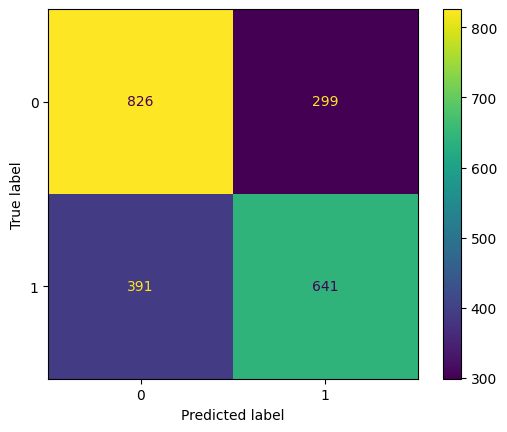

In [34]:
predict = svm_model.fit(train_X_tfidf,train_y).predict(test_X_tfidf)

print(classification_report(test_y, predict))

matrix = confusion_matrix(test_y, predict)

matrix = ConfusionMatrixDisplay(matrix)

matrix.plot()

## Matrices on Validation Data

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1141
           1       0.69      0.63      0.66      1052

    accuracy                           0.68      2193
   macro avg       0.68      0.68      0.68      2193
weighted avg       0.68      0.68      0.68      2193



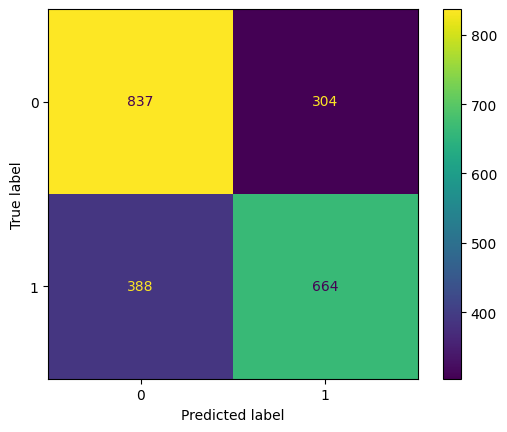

In [35]:
predict = svm_model.fit(train_X_tfidf,train_y).predict(valid_X_tfidf)

print(classification_report(valid_y, predict))

matrix = confusion_matrix(valid_y, predict)

matrix = ConfusionMatrixDisplay(matrix)

matrix.plot()

## As a conclusion, the algorithms tend to predict that a tweet is against a certain candidate, rather than with him, as we can see from the high precision and low recall on FAVOR. This might be improved if we use a higher weight for the 'FAVOR' class.